# Optimization in Scipy

Optimize Rosenbrock function (see on wikipedia) with scipy routines

Prepared for Astrohackweek 2016 by Yu Feng.

In [204]:
from scipy import optimize

In [205]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [206]:
def drawrosen(ax):
    x = linspace(-2, 2, 200)
    y = linspace(-2, 2, 200)
    xx, yy = numpy.meshgrid(x, y)
    map = optimize.rosen(array([xx.ravel(), yy.ravel()]).reshape(2, -1)).reshape(xx.shape)
    ax.contour(x, y, log10(map + 1e-9), vmin=-4, cmap=cm.coolwarm) #levels=(1, 2, 4, 8, 16, 32))
    

def walk(axes, method, *args, **kwargs):
    x0 = (-1.4, -1.325)
    l = [x0]
    i = [x0]
    def myfunc(x):
        l.append(x.copy())
        return optimize.rosen(x)
    def cb(x):
        i.append(x.copy())
    r = optimize.minimize(myfunc, x0, jac=optimize.rosen_der,
                            hess=optimize.rosen_hess, #hessp=optimize.rosen_hess_prod,
                          callback=cb,
                          method=method, options=dict(disp=False))
    print(method, r)
    l.append(r.x.copy())
    x = array(l).T[0]
    y = array(l).T[1]
    axes[0].plot(x, y, 'x', **kwargs)
    i.append(r.x.copy())
    x = array(i).T[0]
    y = array(i).T[1]
    axes[0].plot(x, y, 'o-', markerfacecolor='none', **kwargs)
    axes[0].set_xticks(linspace(-1.5, 1.5, 7, endpoint=True))
    axes[0].set_yticks(linspace(-1.5, 1.5, 7, endpoint=True))
    axes[0].set_xlim(-2, 2)
    axes[0].set_ylim(-2, 2)
    axes[1].plot(optimize.rosen(array(l).T))
    axes[1].set_yscale('log')
    axes[1].set_ylim(3e-4, 5e3)
    axes[1].set_xlim(0, 50)
    axes[1].yaxis.set_label_position('right')
    axes[1].yaxis.set_ticks_position('right')
    axes[1].text(0.93, 0.8, method, ha='right', va='top', transform=axes[1].transAxes)
    if not hasattr(r, 'njev'): r.njev=0
    if not hasattr(r, 'nhev'): r.nhev=0
    axes[1].text(0.93, 0.7, 'nfev=%d\nnjev=%d\nnhev=%d' % (r.nfev, r.njev, r.nhev),
                 ha='right', va='top', transform=axes[1].transAxes)

/project/projectdirs/m779/yfeng1/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/_minimize.py:381: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)
/project/projectdirs/m779/yfeng1/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/_minimize.py:385: RuntimeWarning: Method Nelder-Mead does not use Hessian information (hess).
  RuntimeWarning)
/project/projectdirs/m779/yfeng1/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/_minimize.py:385: RuntimeWarning: Method CG does not use Hessian information (hess).
  RuntimeWarning)


Nelder-Mead  final_simplex: (array([[ 0.99998328,  0.99996691],
       [ 1.00000046,  1.00000346],
       [ 1.00001382,  1.00002384]]), array([  2.91874575e-10,   6.43831256e-10,   1.64061725e-09]))
           fun: 2.9187457483708601e-10
       message: 'Optimization terminated successfully.'
          nfev: 110
           nit: 57
        status: 0
       success: True
             x: array([ 0.99998328,  0.99996691])
CG      fun: 3.087329274425641e-15
     jac: array([  2.21399848e-06,  -1.10983085e-06])
 message: 'Optimization terminated successfully.'
    nfev: 53
     nit: 22
    njev: 53
  status: 0
 success: True
       x: array([ 1.        ,  0.99999999])


/project/projectdirs/m779/yfeng1/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/_minimize.py:385: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


BFGS       fun: 4.192258813510404e-15
 hess_inv: array([[ 0.48964222,  0.97880087],
       [ 0.97880087,  1.96161731]])
      jac: array([  9.87537261e-07,  -5.52331314e-07])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 23
     njev: 32
   status: 0
  success: True
        x: array([ 0.99999994,  0.99999988])
trust-ncg      fun: 4.7410691140662301e-12
    hess: array([[ 801.99980438, -399.99992939],
       [-399.99992939,  200.        ]])
     jac: array([  8.64562550e-05,  -4.34046544e-05])
 message: 'Optimization terminated successfully.'
    nfev: 21
    nhev: 19
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([ 0.99999982,  0.99999943])


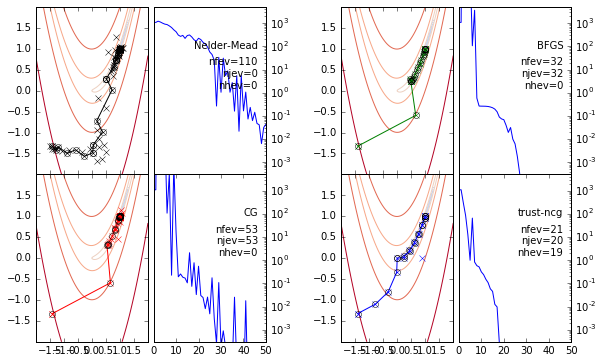

In [207]:
gsleft = GridSpec(2, 2)
gsright = GridSpec(2, 2)
gsleft.update(left=0.05, right=0.45, wspace=0.05, hspace=0)
gsright.update(left=0.58, right=0.98, wspace=0.05, hspace=0)

fig = figure(figsize=(8, 6))
def makepair(gs, i):
    ax1 = fig.add_subplot(gs[i, 0])
    ax2 = fig.add_subplot(gs[i, 1])
    if i == 0:
        ax1.set_xticks([])
        ax2.set_xticks([])
    return [ax1, ax2]

axes = makepair(gsleft, 0)
drawrosen(axes[0])
walk(axes, "Nelder-Mead", '+-', color='k')
axes = makepair(gsleft, 1)
drawrosen(axes[0])
walk(axes, "CG", '+-', color='r')
axes = makepair(gsright, 0)
drawrosen(axes[0])
walk(axes, "BFGS", 'x-', color='g')
axes = makepair(gsright, 1)
drawrosen(axes[0])
#walk(axes[3], "Newton-CG", '+-', color='b')
walk(axes, "trust-ncg", '+-', color='b')

savefig('Rosenbrock.pdf', dpi=200)
#trust-ncg 